In [1]:
import os, sys
from pathlib import Path
currentdir = os.getcwd()
currentdir

'/Users/jerzykaminski/Documents/GitHub/ITMO-labs/cmm-labs/individual_task'

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split


In [3]:
data = pd.read_csv(str(currentdir)+'/data/city_hour.csv', parse_dates=True)
data.dropna(inplace=True)
data = data.where(data['City'] == 'Delhi').dropna()
test = data.iloc[169:193, :]
data = data.iloc[1:169, :]
data

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
245188,Delhi,2015-01-01 17:00:00,191.12,257.40,15.44,38.40,51.24,34.98,13.11,18.00,34.38,3.58,5.23,3.78,450.0,Severe
245189,Delhi,2015-01-01 18:00:00,218.44,351.01,22.85,44.73,59.26,34.80,18.35,19.17,38.42,3.67,5.93,4.98,446.0,Severe
245190,Delhi,2015-01-01 19:00:00,296.80,600.95,69.20,47.76,101.68,34.25,16.67,21.50,49.12,14.75,27.13,8.78,475.0,Severe
245191,Delhi,2015-01-01 20:00:00,336.43,714.63,148.42,46.31,171.10,35.75,12.17,17.67,56.44,26.56,45.62,9.99,480.0,Severe
245192,Delhi,2015-01-01 21:00:00,326.64,691.84,181.10,44.33,200.68,30.94,9.03,13.67,47.73,36.28,45.97,10.37,484.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245357,Delhi,2015-01-08 18:00:00,205.66,321.34,24.90,54.18,60.19,167.38,6.43,3.49,31.72,7.44,18.28,4.33,390.0,Very Poor
245358,Delhi,2015-01-08 19:00:00,222.35,347.43,25.36,58.58,57.64,115.19,5.70,2.73,43.03,7.83,17.96,4.77,372.0,Very Poor
245359,Delhi,2015-01-08 20:00:00,334.73,523.01,23.72,51.13,54.14,130.50,6.82,2.88,40.22,7.46,15.19,6.93,376.0,Very Poor
245360,Delhi,2015-01-08 21:00:00,269.94,421.79,21.16,48.52,49.72,132.68,4.10,3.06,40.28,5.61,11.33,5.66,378.0,Very Poor


In [4]:
test

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
245362,Delhi,2015-01-08 23:00:00,238.76,373.06,18.52,44.72,45.93,135.53,4.67,2.92,47.06,4.65,10.58,5.01,386.0,Very Poor
245363,Delhi,2015-01-09 00:00:00,242.29,378.58,18.90,47.03,45.84,131.84,12.86,3.70,45.07,4.31,9.01,5.21,383.0,Very Poor
245364,Delhi,2015-01-09 01:00:00,178.54,371.22,15.97,37.70,40.92,141.21,16.20,3.78,49.47,3.91,9.37,5.03,383.0,Very Poor
245365,Delhi,2015-01-09 02:00:00,203.81,381.44,17.12,39.78,41.37,138.54,11.62,4.36,30.00,3.77,8.38,5.13,381.0,Very Poor
245366,Delhi,2015-01-09 03:00:00,201.59,390.12,14.93,37.55,38.69,141.44,10.88,4.21,29.76,3.98,7.02,5.21,381.0,Very Poor
245367,Delhi,2015-01-09 04:00:00,175.58,329.92,14.17,34.71,36.21,145.79,10.17,4.45,23.61,3.61,6.52,4.34,381.0,Very Poor
245368,Delhi,2015-01-09 05:00:00,154.70,276.43,12.03,33.40,33.56,145.12,9.59,4.22,20.28,3.03,5.10,3.64,377.0,Very Poor
245369,Delhi,2015-01-09 06:00:00,190.90,385.63,12.53,31.34,33.37,146.68,10.40,3.98,26.80,3.22,5.13,5.06,377.0,Very Poor
245370,Delhi,2015-01-09 07:00:00,165.22,319.46,12.80,31.64,34.19,144.76,9.90,3.78,26.82,3.20,4.82,4.30,376.0,Very Poor
245371,Delhi,2015-01-09 08:00:00,134.43,225.55,15.50,33.31,37.97,140.96,9.78,3.78,32.28,3.22,4.92,3.02,374.0,Very Poor


/Users/jerzykaminski/miniforge3/envs/bamt-dev/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jerzykaminski/miniforge3/envs/bamt-dev/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.37286D+00    |proj g|=  5.51345D-02

At iterate    5    f=  4.35152D+00    |proj g|=  5.55296D-03

At iterate   10    f=  4.33340D+00    |proj g|=  1.59979D-02

At iterate   15    f=  4.33052D+00    |proj g|=  2.33065D-04

At iterate   20    f=  4.32914D+00    |proj g|=  1.20891D-02

At iterate   25    f=  4.32297D+00    |proj g|=  4.56980D-03

At iterate   30    f=  4.32196D+00    |proj g|=  5.18305D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/jerzykaminski/miniforge3/envs/bamt-dev/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


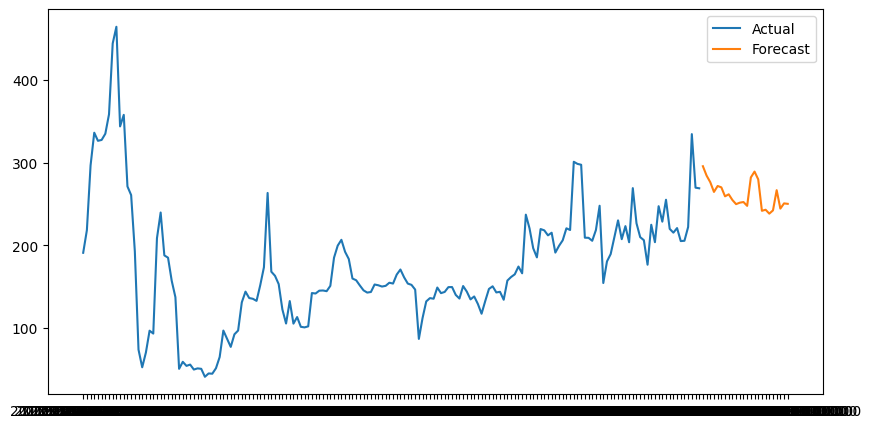

In [5]:
def sarimax_model_forecast(data, order, seasonal_order, forecast_period):
    """
    This function takes the data, order and seasonal order of the SARIMAX model and returns the forecasted values.
    """
    model = sm.tsa.statespace.SARIMAX(data['PM2.5'], order=order, seasonal_order=seasonal_order)
    results = model.fit()
    forecast = results.get_forecast(steps=forecast_period)
    return forecast.predicted_mean

forecast = sarimax_model_forecast(data, (1, 1, 1), (1, 1, 1, 24), 24)

def plot_forecast(data, forecast):
    """
    This function plots the actual and forecasted values.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(data['Datetime'], data['PM2.5'], label='Actual')
    plt.plot(test['Datetime'], forecast, label='Forecast')
    plt.plot()
    plt.legend()
    plt.show()

plot_forecast(data, forecast)